# Dr. Semmelweis and the Importance of Handwashing

## Project Description
In 1847, the Hungarian physician Ignaz Semmelweis made a breakthrough
discovery: he discovered handwashing and enforced it at his hospital to save 
hundreds of lives. Using, R, let's perform data analysis to explore the data 
behind one of the most important discoveries in modern medicine.


![Dr. Semmelweis](ignaz_semmelweis_1860.jpeg)

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

We will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital.

The data is stored as two CSV files within the `data` folder.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [36]:
# Import libraries
library(tidyverse)

The question we would like to answer is: *How much did handwashing reduce monthly death rates on average?*

### Load Data

In [37]:
# Read datasets
yearly <- read_csv("data/yearly_deaths_by_clinic.csv", show_col_types = FALSE)
monthly <- read_csv("data/monthly_deaths.csv", show_col_types = FALSE)

# Display the last few rows of `yearly` dataset and the first of `monthly` dataset
tail(yearly)
head(monthly)

year,births,deaths,clinic
<dbl>,<dbl>,<dbl>,<chr>
1841,2442,86,clinic 2
1842,2659,202,clinic 2
1843,2739,164,clinic 2
1844,2956,68,clinic 2
1845,3241,66,clinic 2
1846,3754,105,clinic 2


date,births,deaths
<date>,<dbl>,<dbl>
1841-01-01,254,37
1841-02-01,239,18
1841-03-01,277,12
1841-04-01,255,4
1841-05-01,255,2
1841-06-01,200,10


Let's take a closer look at these datasets:

In [38]:
# Summary statistics of the `yearly` dataset
summary(yearly)

# Structure of the `yearly` dataset
str(yearly)

      year          births         deaths         clinic         
 Min.   :1841   Min.   :2442   Min.   : 66.0   Length:12         
 1st Qu.:1842   1st Qu.:2902   1st Qu.:100.2   Class :character  
 Median :1844   Median :3108   Median :219.5   Mode  :character  
 Mean   :1844   Mean   :3153   Mean   :223.3                     
 3rd Qu.:1845   3rd Qu.:3338   3rd Qu.:263.5                     
 Max.   :1846   Max.   :4010   Max.   :518.0                     

spc_tbl_ [12 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ year  : num [1:12] 1841 1842 1843 1844 1845 ...
 $ births: num [1:12] 3036 3287 3060 3157 3492 ...
 $ deaths: num [1:12] 237 518 274 260 241 459 86 202 164 68 ...
 $ clinic: chr [1:12] "clinic 1" "clinic 1" "clinic 1" "clinic 1" ...
 - attr(*, "spec")=
  .. cols(
  ..   year = col_double(),
  ..   births = col_double(),
  ..   deaths = col_double(),
  ..   clinic = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


In [39]:
# Summary statistics of the `monthly` dataset
summary(monthly)

# Structure of the `monthly` dataset
str(monthly)

      date                births          deaths     
 Min.   :1841-01-01   Min.   :190.0   Min.   : 0.00  
 1st Qu.:1843-02-08   1st Qu.:242.5   1st Qu.: 8.00  
 Median :1845-02-15   Median :264.0   Median :16.50  
 Mean   :1845-02-11   Mean   :267.0   Mean   :22.47  
 3rd Qu.:1847-02-22   3rd Qu.:292.8   3rd Qu.:36.75  
 Max.   :1849-03-01   Max.   :406.0   Max.   :75.00  

spc_tbl_ [98 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date  : Date[1:98], format: "1841-01-01" "1841-02-01" ...
 $ births: num [1:98] 254 239 277 255 255 200 190 222 213 236 ...
 $ deaths: num [1:98] 37 18 12 4 2 10 16 3 4 26 ...
 - attr(*, "spec")=
  .. cols(
  ..   date = col_date(format = ""),
  ..   births = col_double(),
  ..   deaths = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


### Data wrangling

We will add a proportion_deaths column to each df, calculating the proportion of deaths per number of births for each year in yearly and month in monthly.

In [40]:
# Proportion of deaths per births by year
yearly = yearly %>%
  group_by(year) %>%
  mutate(proportion_deaths = deaths / births)

# Visualize the new `yearly` dataset
yearly

New names:
• `` -> `...1`


year,births,deaths,clinic,proportion_deaths
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1841,3036,237,clinic 1,0.07806324
1842,3287,518,clinic 1,0.15759051
1843,3060,274,clinic 1,0.08954248
1844,3157,260,clinic 1,0.08235667
1845,3492,241,clinic 1,0.06901489
1846,4010,459,clinic 1,0.11446384
1841,2442,86,clinic 2,0.03521704
1842,2659,202,clinic 2,0.07596841
1843,2739,164,clinic 2,0.05987587


In [41]:
# Monthly Proportion of death per year
monthly <- monthly %>%
  group_by(date) %>%
  mutate(proportion_deaths = deaths / births)

# Visualize the new `monthly` dataset
monthly

New names:
• `` -> `...1`


date,births,deaths,proportion_deaths
<date>,<dbl>,<dbl>,<dbl>
1841-01-01,254,37,0.145669291
1841-02-01,239,18,0.075313808
1841-03-01,277,12,0.043321300
1841-04-01,255,4,0.015686275
1841-05-01,255,2,0.007843137
1841-06-01,200,10,0.050000000
1841-07-01,190,16,0.084210526
1841-08-01,222,3,0.013513514
1841-09-01,213,4,0.018779343


### Data Visualization

Now, it's time to create two ggplot line plots: one for the yearly proportion of deaths (with a different colored line for each clinic) and another for the monthly proportion:

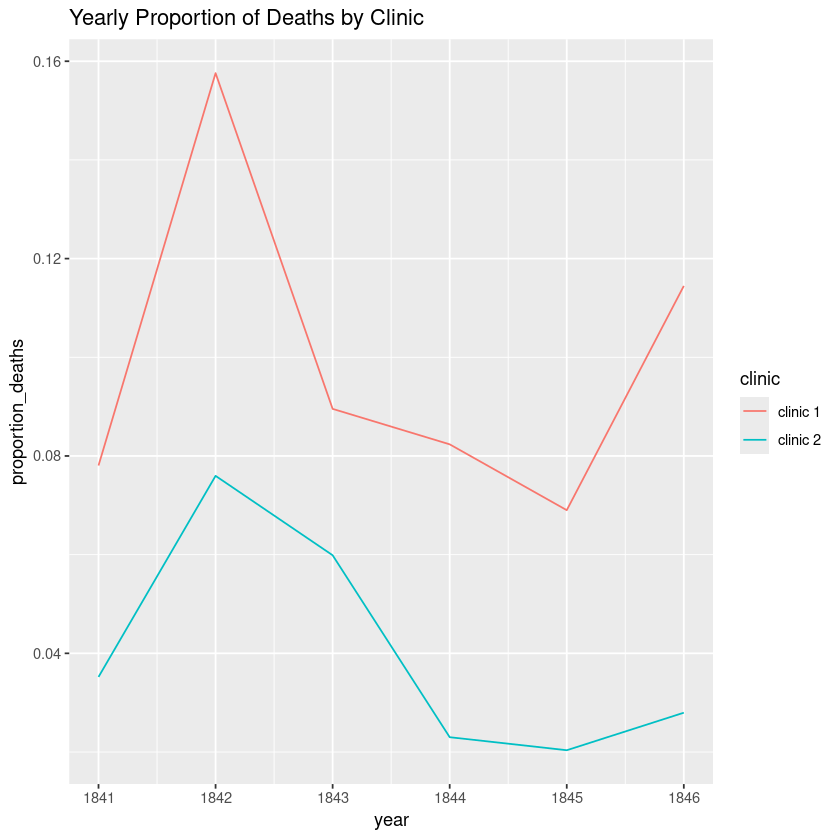

In [42]:
# Yearly Proportion of Deaths Line plot by Clinic
ggplot(yearly, aes(x = year, y = proportion_deaths, color = clinic)) + geom_line() + ggtitle("Yearly Proportion of Deaths by Clinic")

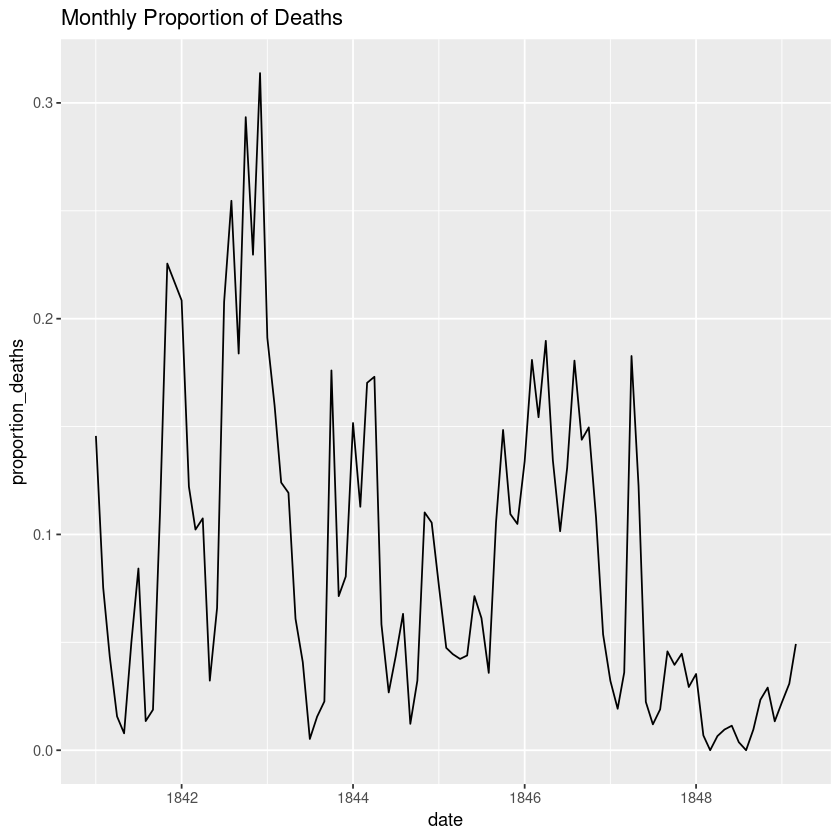

In [43]:
# Monthly Proportion of Deaths Line plot 
ggplot(monthly, aes(x = date, y = proportion_deaths)) + geom_line() + ggtitle("Monthly Proportion of Deaths")

### Introducing Handwashing

Let's add a handwashing_started boolean column to monthly using June 1st, 1847 as the threshold; TRUE should mean that handwashing has started at the clinic.

In [44]:
# Boolean column to indicate the start of handwashing
monthly <- monthly %>%
	mutate(handwashing_started = date >= "1847-06-01")

# Last rows
tail(monthly)

New names:
• `` -> `...1`


date,births,deaths,proportion_deaths,handwashing_started
<date>,<dbl>,<dbl>,<dbl>,<lgl>
1848-10-01,299,7,0.02341137,TRUE
1848-11-01,310,9,0.02903226,TRUE
1848-12-01,373,5,0.01340483,TRUE
1849-01-01,403,9,0.02233251,TRUE
1849-02-01,389,12,0.03084833,TRUE
1849-03-01,406,20,0.04926108,TRUE


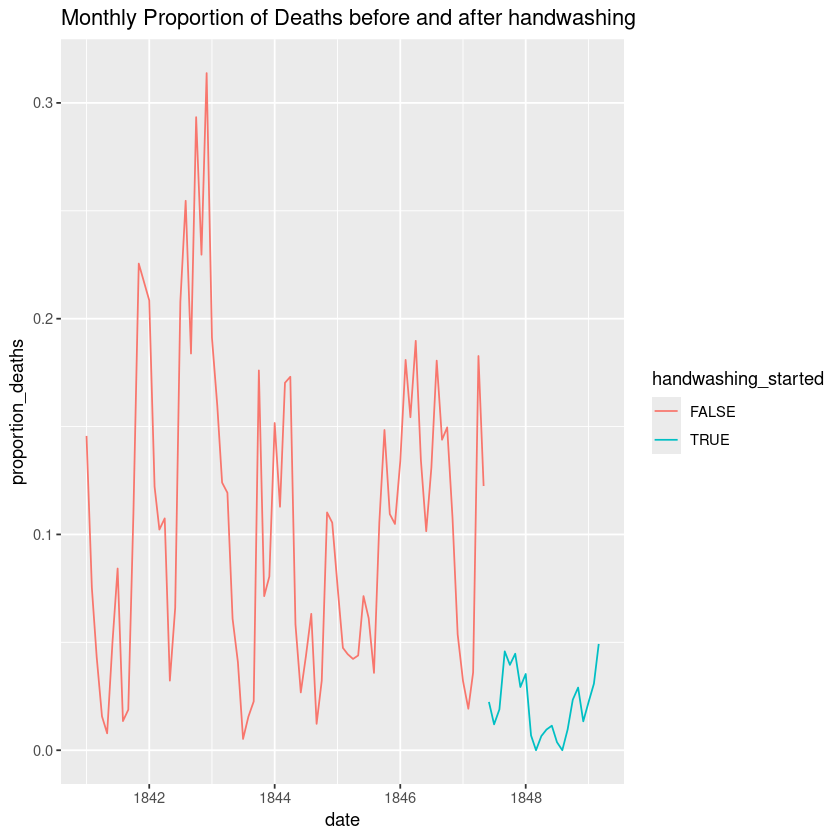

In [45]:
# Monthly Proportion of Deaths before and after handwashing Line plot 
ggplot(monthly, aes(x = date, y = proportion_deaths, color = handwashing_started)) + geom_line() + ggtitle("Monthly Proportion of Deaths before and after handwashing")

According to rhis graph, there seems to be a very important difference in terms of deaths before and after **handwashing**.

### Mean analysys

Let's calculate the mean proportion of deaths before and after handwashing from the monthly data, and store the result as a 2x2 df named monthly_summary with the first column containing the handwashing_started groups and the second column having the mean proportion of deaths.

In [46]:
# Mean Proportion of deaths before and after Handwashing
monthly_summary <- monthly %>%
	group_by(handwashing_started) %>%
	summarize(mean_prop = mean(proportion_deaths))

# Let's see the table
monthly_summary

handwashing_started,mean_prop
<lgl>,<dbl>
FALSE,0.10504998
TRUE,0.02109338


Our data show that after **handwashing** , the proportion of deaths has reduced about 5 times, showing the importance of being clean to protect ourselves against bacteria.

---